#📌 Extracción

In [341]:
#Importando
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [342]:
bd = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
bd.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [343]:

#Normalizar columnas anidadas
customer_bd = pd.json_normalize(bd['customer'])
phone_bd = pd.json_normalize(bd['phone'])
internet_bd = pd.json_normalize(bd['internet'])
account_bd = pd.json_normalize(bd['account'])

#Eliminar las columnas anidadas originales del DataFrame
bd.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#Concatenar el DataFrame original con los nuevos datos normalizados
bd = pd.concat([bd, customer_bd, phone_bd, internet_bd, account_bd], axis=1)

#Verificar los cambios
bd.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [344]:
bd.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#🔧 Transformación

In [345]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [346]:
bd.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [347]:

bd.rename(columns={
    'customerID': 'id',
    'Churn':'cancelado',
    'gender': 'genero',
    'SeniorCitizen': 'mayor65',
    'Partner': 'tienePareja',
    'Dependents': 'tieneDependentes',
    'tenure': 'mesesContrato',
    'PhoneService': 'servicioTelefonico',
    'MultipleLines': 'lineasMultiples',
    'InternetService': 'servicioInternet',
    'OnlineSecurity': 'seguridadLinea',
    'OnlineBackup': 'SoporteLinea',
    'DeviceProtection': 'proteccionDispositivos',
    'TechSupport': 'soporteTecnico',
    'StreamingTV': 'servicioTv',
    'StreamingMovies': 'servicioPeliculas',
    'PaperlessBilling': 'facturasElectronicas',
    'PaymentMethod': 'metodoPago',
    'Contract': 'tipoContrato',
    'Charges.Monthly': 'gastosMensuales',
    'Charges.Total': 'gastosTotales'
}, inplace=True)

In [348]:
bd.head()

,id,cancelado,genero,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Validación Valores Únicos




In [349]:
# Validar valores únicos por columna
for col in bd.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {bd[col].nunique()}")
  if bd[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(bd[col].unique()))
  print('-' * 60) # dividir secciones


Valores únicos columna 'id': 7267
------------------------------------------------------------
Valores únicos columna 'cancelado': 3
cancelado: ['No' 'Yes' '']
------------------------------------------------------------
Valores únicos columna 'genero': 2
genero: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'mayor65': 2
mayor65: [0 1]
------------------------------------------------------------
Valores únicos columna 'tienePareja': 2
tienePareja: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'tieneDependentes': 2
tieneDependentes: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'mesesContrato': 73
------------------------------------------------------------
Valores únicos columna 'servicioTelefonico': 2
servicioTelefonico: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'lineasMultip

##Valdación Valores Duplicados

In [350]:
# Validar si hay numeros duplicado
duplicados = bd.duplicated()
print(duplicados.sum())


0


## Validación Valores Nulos

In [351]:
bd.applymap(lambda x: str(x).strip() == '').sum()

,0
id,0
cancelado,224
genero,0
mayor65,0
tienePareja,0
tieneDependentes,0
mesesContrato,0
servicioTelefonico,0
lineasMultiples,0
servicioInternet,0


## Mejoras de Inconsistencias

In [352]:
bd[['cancelado', 'gastosTotales']].isnull().sum()

,0
cancelado,0
gastosTotales,0


In [353]:
bd=bd.dropna(subset=['cancelado', 'gastosTotales'])
bd[['cancelado', 'gastosTotales']].isnull().sum()

,0
cancelado,0
gastosTotales,0


## Convirtiendo Variables

In [354]:
columnas = ['lineasMultiples', 'seguridadLinea', 'SoporteLinea', 'proteccionDispositivos', 'soporteTecnico', 'servicioTv', 'servicioPeliculas','cancelado','tienePareja','tieneDependentes','servicioTelefonico','facturasElectronicas']
bd[columnas].head()

,lineasMultiples,seguridadLinea,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,cancelado,tienePareja,tieneDependentes,servicioTelefonico,facturasElectronicas
0,No,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes
1,Yes,No,No,No,No,No,Yes,No,No,No,Yes,No
2,No,No,No,Yes,No,No,No,Yes,No,No,Yes,Yes
3,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes
4,No,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes


In [355]:
mapping = {'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}

for col in columnas:
    bd[col] = bd[col].replace('No internet service', 'No internet service', regex=True).replace('No phone service', 'No phone service', regex=True)
    bd[col] = bd[col].astype(str).str.strip()

    # 2. Aplica el mapeo
    bd[col] = bd[col].map(mapping)

# 3. Muestra el resultado
print(bd[columnas].head())


   lineasMultiples  seguridadLinea  SoporteLinea  proteccionDispositivos  \
0                0               0             1                       0   
1                1               0             0                       0   
2                0               0             0                       1   
3                0               0             1                       1   
4                0               0             0                       0   

   soporteTecnico  servicioTv  servicioPeliculas  cancelado  tienePareja  \
0               1           1                  0        0.0            1   
1               0           0                  1        0.0            0   
2               0           0                  0        1.0            0   
3               0           1                  1        1.0            1   
4               1           1                  0        1.0            1   

   tieneDependentes  servicioTelefonico  facturasElectronicas  
0                 1   

In [356]:
bd['cancelado'].head()

,cancelado
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [357]:
bd['cancelado'] = bd['cancelado'].fillna(0).astype(int)
bd['cancelado'].head()

,cancelado
0,0
1,0
2,1
3,1
4,1


In [358]:
print(bd[columnas].head())

   lineasMultiples  seguridadLinea  SoporteLinea  proteccionDispositivos  \
0                0               0             1                       0   
1                1               0             0                       0   
2                0               0             0                       1   
3                0               0             1                       1   
4                0               0             0                       0   

   soporteTecnico  servicioTv  servicioPeliculas  cancelado  tienePareja  \
0               1           1                  0          0            1   
1               0           0                  1          0            0   
2               0           0                  0          1            0   
3               0           1                  1          1            1   
4               1           1                  0          1            1   

   tieneDependentes  servicioTelefonico  facturasElectronicas  
0                 1   

In [359]:
bd.tail()

,id,cancelado,genero,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65
7266,9995-HOTOH,0,Male,0,1,1,63,0,0,DSL,...,1,1,0,1,1,Two year,0,Electronic check,59.00,3707.6


## Columna de Cuentas Diarias

In [360]:
#Agregando la columna de cuentas diarias

bd['cuentasDiarias'] = round(bd['gastosMensuales'] / 30, 1)

In [361]:
bd['cuentasDiarias']

,cuentasDiarias
0,2.2
1,2.0
2,2.5
3,3.3
4,2.8
...,...
7262,1.8
7263,2.8
7264,1.7
7265,2.3


#📊 Carga y análisis

#Analisis Descriptivo

In [362]:
#Analisis descriptivo
bd.describe()

,cancelado,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,seguridadLinea,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,facturasElectronicas,gastosMensuales,cuentasDiarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2.158745
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,1.002283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,1.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,4.000000


## Distribución por evasión

In [363]:
bd['cancelado'].value_counts()

,count
cancelado,
0,5398
1,1869


####Distribución por permanencia

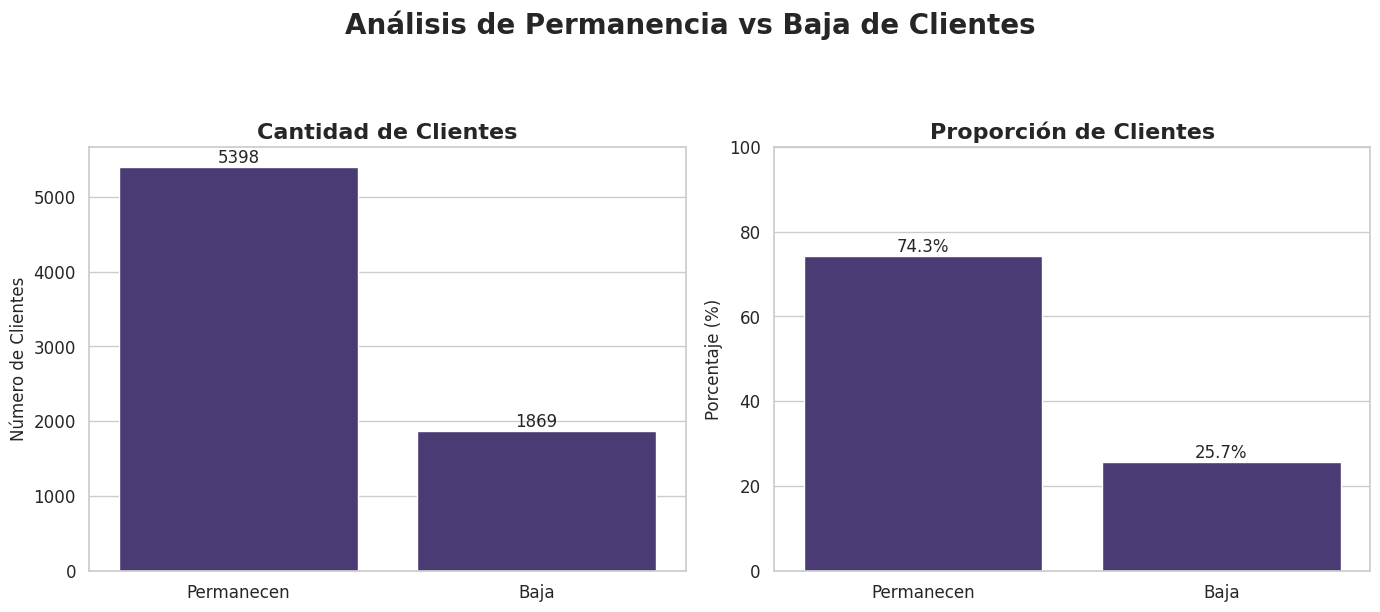

In [364]:
sns.set_theme(style="whitegrid", font_scale=1.1, palette="viridis")

# Datos absolutos y porcentuales
conteo_abs = bd['cancelado'].value_counts().sort_index()
conteo_pct = bd['cancelado'].value_counts(normalize=True).sort_index() * 100

# Etiquetas
etiquetas = ['Permanecen', 'Baja']

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico 1: Cantidad de Clientes (Números Absolutos) ---
sns.barplot(x=etiquetas, y=conteo_abs, ax=axes[0])
axes[0].set_title("Cantidad de Clientes", fontsize=16, weight='bold')
axes[0].set_ylabel("Número de Clientes", fontsize=12)
axes[0].set_xlabel("")  # Oculta la etiqueta del eje x si no es necesaria

# Añadir etiquetas de datos
for i, valor in enumerate(conteo_abs):
    axes[0].text(i, valor, f'{valor}', ha='center', va='bottom', fontsize=12)

# --- Gráfico 2: Proporción de Clientes (Porcentajes) ---
sns.barplot(x=etiquetas, y=conteo_pct, ax=axes[1])
axes[1].set_title("Proporción de Clientes", fontsize=16, weight='bold')
axes[1].set_ylabel("Porcentaje (%)", fontsize=12)
axes[1].set_xlabel("")

# Ajustar el límite del eje Y
axes[1].set_ylim(0, 100)

# Añadir etiquetas de datos
for i, valor in enumerate(conteo_pct):
    axes[1].text(i, valor, f'{valor:.1f}%', ha='center', va='bottom', fontsize=12)

# Título principal de la figura
plt.suptitle("Análisis de Permanencia vs Baja de Clientes", fontsize=20, weight='bold', y=1.02)

# Ajustar el layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###Distribución por variables categoricas

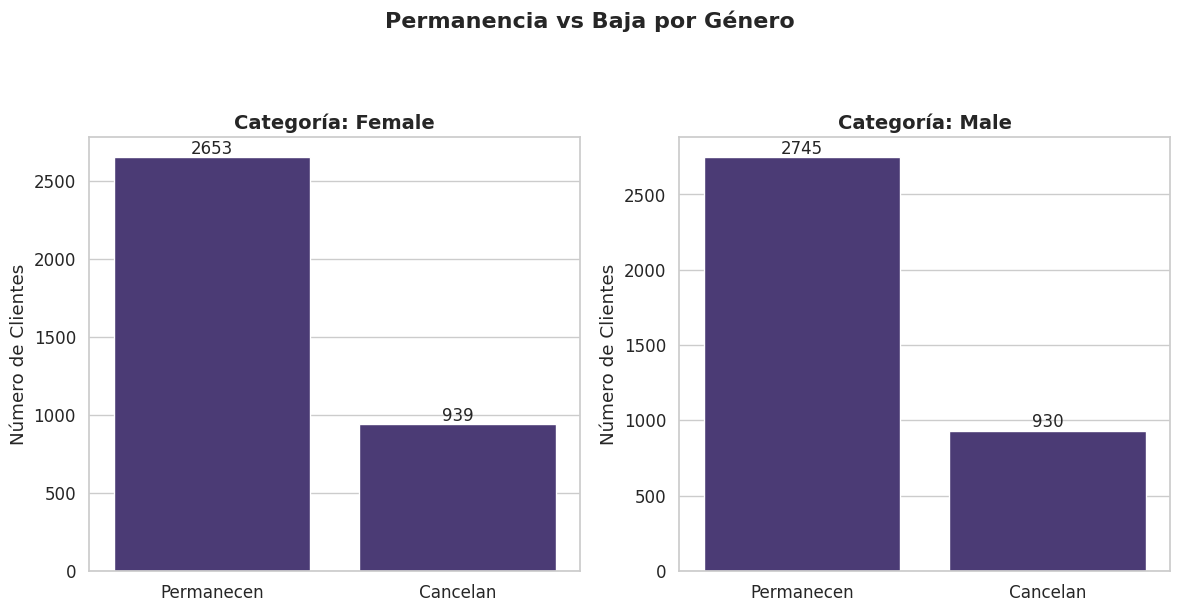

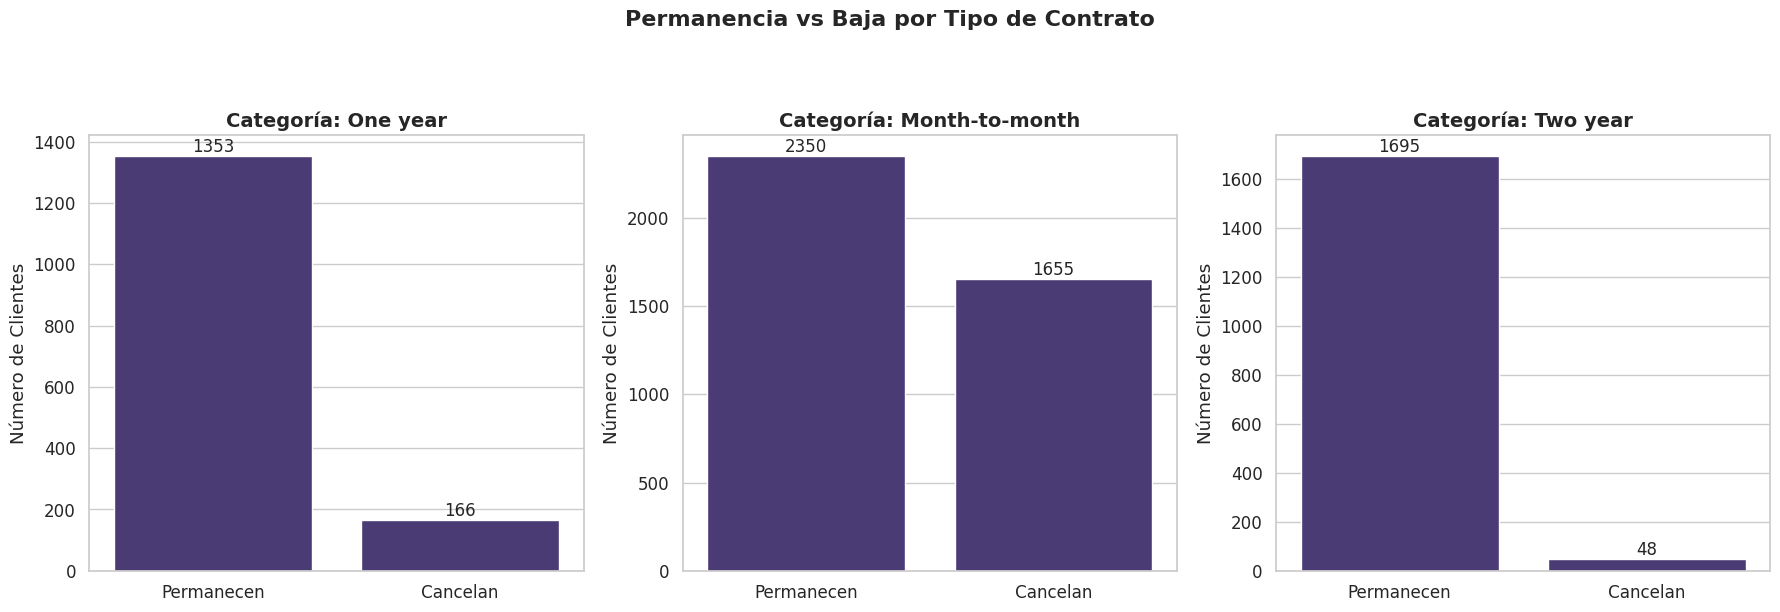

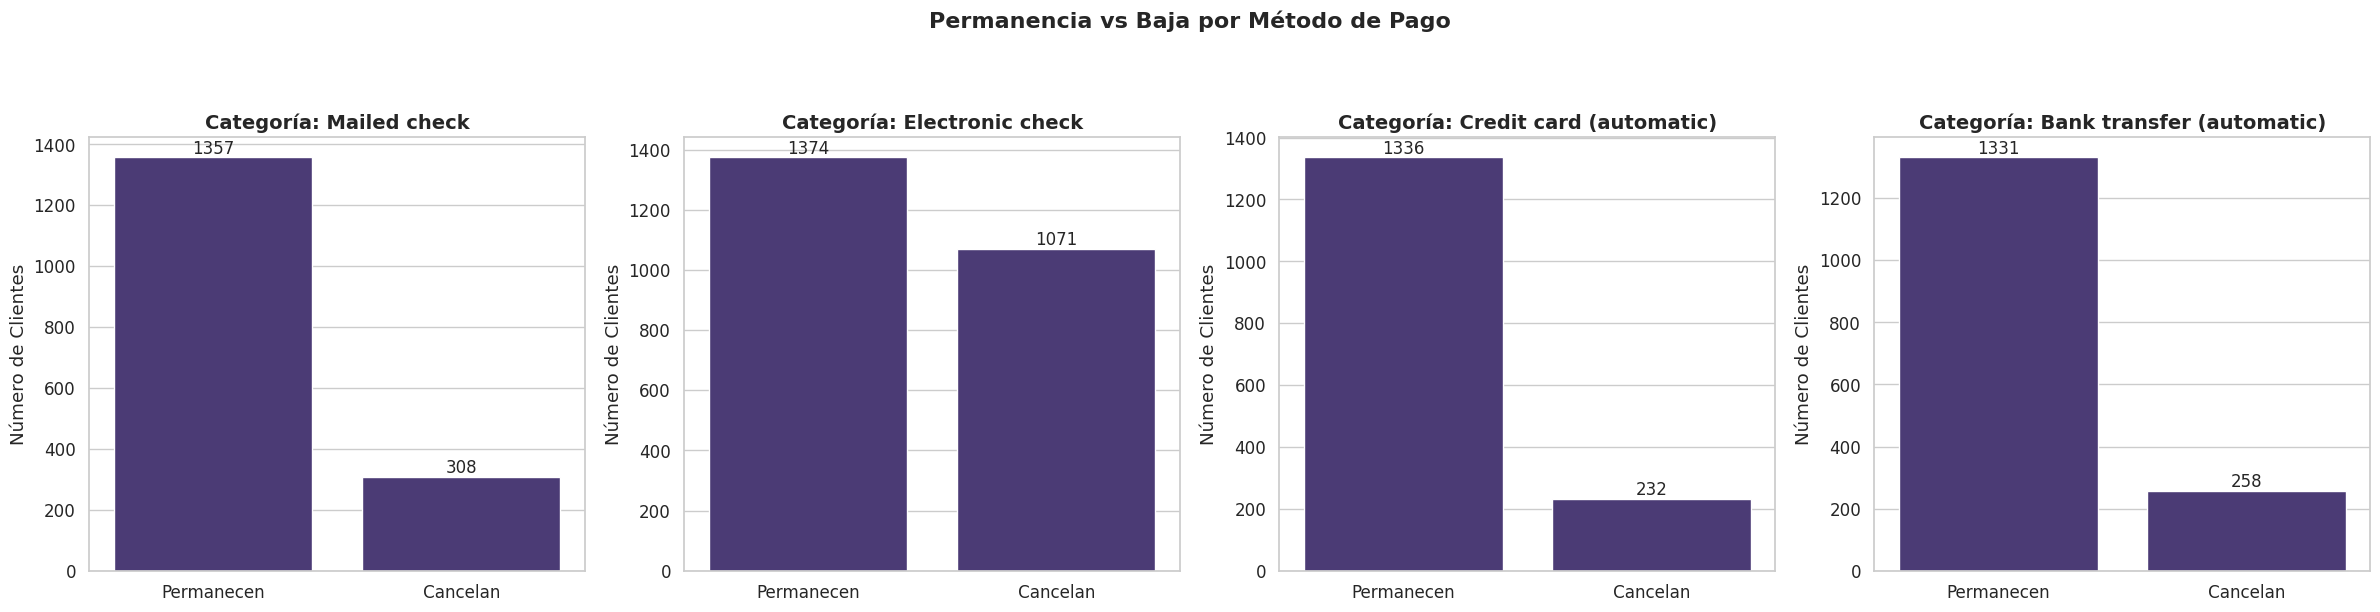

In [365]:
sns.set_theme(style="whitegrid", font_scale=1.1, palette="viridis")

# Lista de columnas a graficar
columnas_a_graficar = ['genero', 'tipoContrato', 'metodoPago']

# Títulos de los gráficos para cada columna
titulos = {
    'genero': 'Permanencia vs Baja por Género',
    'tipoContrato': 'Permanencia vs Baja por Tipo de Contrato',
    'metodoPago': 'Permanencia vs Baja por Método de Pago'
}

# Iterar sobre cada columna para generar los gráficos
for columna in columnas_a_graficar:
    # Obtener las categorías únicas de la columna
    categorias = bd[columna].unique()

    # Crear una figura para los gráficos de la columna actual
    fig, axes = plt.subplots(1, len(categorias), figsize=(len(categorias) * 6, 6))

    if len(categorias) == 1:
        axes = [axes]  # Asegura que sea un iterable si solo hay 1 categoría

    fig.suptitle(titulos[columna], fontsize=16, weight='bold', y=1.02)

    for i, categoria in enumerate(categorias):
        # Filtrar el DataFrame por la categoría actual
        df_filtrado = bd[bd[columna] == categoria]

        # Calcular los conteos de cancelaciones (0 y 1)
        conteo_cancelados = df_filtrado['cancelado'].value_counts().sort_index()

        # Asegurarse de que ambos valores (0 y 1) existan en el conteo para evitar errores
        if 0 not in conteo_cancelados:
            conteo_cancelados[0] = 0
        if 1 not in conteo_cancelados:
            conteo_cancelados[1] = 0
        conteo_cancelados = conteo_cancelados.sort_index()

        # Crear el gráfico de barras en el subgráfico correspondiente
        sns.barplot(x=['Permanecen', 'Cancelan'], y=conteo_cancelados, ax=axes[i])
        axes[i].set_title(f'Categoría: {categoria}', fontsize=14, weight='bold')
        axes[i].set_ylabel("Número de Clientes")

        # Añadir etiquetas de datos
        for j, valor in enumerate(conteo_cancelados):
            if valor > 0:  # Evita mostrar 0 en el gráfico si no hay datos
                axes[i].text(j, valor, f'{valor}', ha='center', va='bottom', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Evasión por variables numéricas

In [368]:
import numpy as np

# Columnas numéricas
columnas_numericas = ['gastosMensuales', 'gastosTotales', 'cuentasDiarias']

# Convertir las columnas a tipo numérico
for col in columnas_numericas:
    bd[col] = pd.to_numeric(bd[col], errors='coerce')
bd[columnas_numericas] = bd[columnas_numericas].fillna(0)
promedios_desviaciones = bd.groupby(['cancelado'])[columnas_numericas].agg(['mean', 'std']).round(2)

promedios_desviaciones


gastosMensuales        gastosTotales          cuentasDiarias      
                     mean    std          mean      std           mean   std
cancelado                                                                   
0                   61.35  31.11       2535.26  2330.80           2.05  1.03
1                   74.44  24.67       1531.80  1890.82           2.48  0.82

/tmp/ipython-input-2123801078.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Sí'])
/tmp/ipython-input-2123801078.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Sí'])
/tmp/ipython-input-2123801078.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No', 'Sí'])


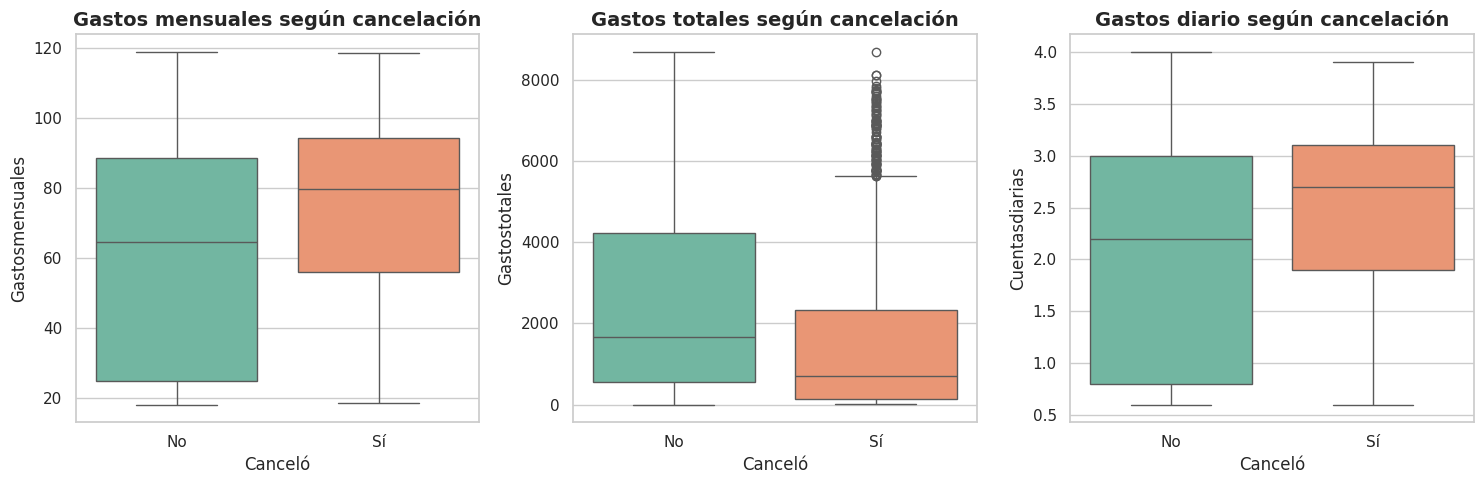

In [369]:
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

# Títulos de los gráficos para cada columna
titulos = {
    'gastosMensuales': 'Gastos mensuales según cancelación',
    'gastosTotales': 'Gastos totales según cancelación',
    'cuentasDiarias': 'Gastos diario según cancelación'
}

# Los subplots se organizan en una sola fila (1, 3)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar sobre las columnas y los subplots
for i, col in enumerate(columnas_numericas):
    # Crear el boxplot en el subplot actual
    sns.boxplot(x='cancelado', y=col, data=bd, ax=axes[i], palette='Set2')

    # Establecer el título del subplot
    axes[i].set_title(titulos[col], fontsize=14, weight='bold')

    # Etiquetas de los ejes
    axes[i].set_xlabel('Canceló', fontsize=12)
    axes[i].set_ylabel(col.capitalize(), fontsize=12)

    # Cambiar las etiquetas del eje x de 0 y 1 a 'No' y 'Sí'
    axes[i].set_xticklabels(['No', 'Sí'])

# Ajustes finales para un buen diseño
plt.tight_layout()
plt.show()

### Meses de contrato

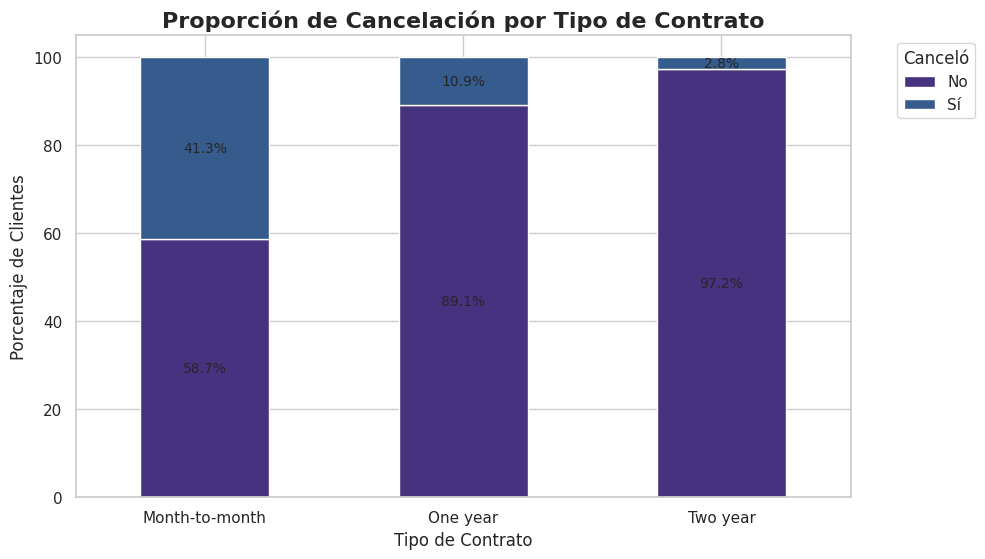

In [370]:
sns.set_theme(style="whitegrid", palette="viridis")

# 1. Calcular el conteo de clientes por tipo de contrato y estado de cancelación
conteo_cruzado = pd.crosstab(bd['tipoContrato'], bd['cancelado'])

# 2. Calcular las proporciones de cancelación y permanencia para cada tipo de contrato
proporciones = conteo_cruzado.div(conteo_cruzado.sum(axis=1), axis=0) * 100

# 3. Crear el gráfico de barras apiladas
proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0)

# 4. Personalizar el gráfico
plt.title('Proporción de Cancelación por Tipo de Contrato', fontsize=16, weight='bold')
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Porcentaje de Clientes', fontsize=12)

# Personalizar la leyenda
plt.legend(title='Canceló', labels=['No', 'Sí'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Anotar los porcentajes en las barras para mayor claridad
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10)

plt.show()

#📄Informe final

# Informe Ejecutivo – Análisis de Evasión de Clientes en Telecom X

## 🎯 Objetivo

Identificar los principales factores que explican la evasión de clientes (*churn*) en Telecom X y proponer estrategias concretas para reducirla.

---

## 📌 Principales Hallazgos
- **Tasa de Evasión Actual:** 26,5% (1 de cada 4 clientes abandona).  
- **Contratos Mes a Mes:** Mayor riesgo de churn.  
- **Antigüedad Baja:** La mayoría de las cancelaciones ocurre en los primeros meses de servicio.  
- **Método de Pago:** *Cheque Electrónico* se asocia a mayor evasión.  
- **Sensibilidad al Precio:** Cargos mensuales altos elevan la probabilidad de cancelación.  
- **Número de Servicios:** Los extremos son negativos (1/2 o 7/8). El rango óptimo: **3/6 servicios**.

---

## 👤 Perfil del Cliente con Mayor Riesgo
- Contrato: **Mes a Mes**  
- Antigüedad: **0/6 meses**  
- Pago: **Cheque Electrónico**  
- Cargos mensuales: **elevados**  
- Servicios: **muy pocos o demasiados**

---

## ✅ Recomendaciones Estratégicas
1. **Migración a Contratos Largos**  
   Incentivar el paso de Mes a Mes a 12/24 meses con beneficios exclusivos.  

2. **Programa de Onboarding**  
   Seguimiento en los primeros 90 días para clientes nuevos.  

3. **Optimizar Métodos de Pago**  
   Bonificaciones o descuentos para migrar a pagos automáticos.  

4. **Venta Cruzada Inteligente**  
   Paquetes entre 3/6 servicios según el perfil del cliente.  

5. **Sistema de Alertas Tempranas**  
   Identificar clientes en riesgo y contactarlos proactivamente.  

---

## 🚀 Impacto Esperado
La implementación de estas medidas puede **reducir la tasa de evasión en 4/6 puntos porcentuales**, aumentando ingresos recurrentes y reduciendo costos de adquisición de nuevos clientes.

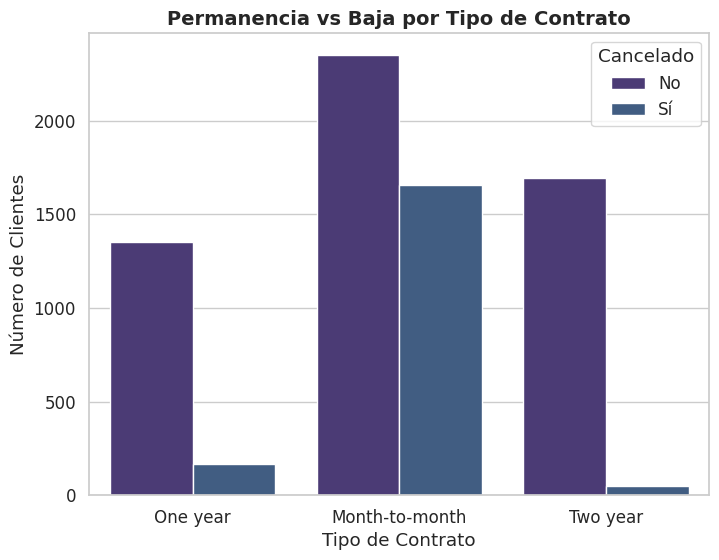

In [380]:
plt.figure(figsize=(8,6))
sns.countplot(data=bd, x="tipoContrato", hue="cancelado")
plt.title("Permanencia vs Baja por Tipo de Contrato", fontsize=14, weight="bold")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.legend(title="Cancelado", labels=["No", "Sí"])
plt.show()